# 0.1 H2PQC

The following describes the basic functionality of Qiskit and how to:

(1) Initialize qubits and classical registers

(2) Perform operations

(3) Make measurements

In addition we cover different simulation backends and plotting.  Lots of this is also in the IBM Qiskit Terra tutorial.

### Code Import

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, execute, BasicAer

import matplotlib.pyplot as plt
import numpy as np

/Users/jacquescarolan/anaconda2/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


### Initialize quanutm and classical registers

In [2]:
# quantum circuit with 2 qubits initliased in the |0> state
q = QuantumRegister(2)

# classical register for readout with 2 bits of representation
c = ClassicalRegister(2)

### Build the quantum circuit and apply some operations

A list of all the availible single and multi-qubit operations can be found here: https://qiskit.org/documentation/summary_of_quantum_operations.html.  For the moment lets just use the ones we've learnt about so far, let's apply Hadmard to qubit 0, and to qubit 1.

In [3]:
# build the circuit
qc = QuantumCircuit(q, c)

# apply Hadamard to qubit 0
qc.h(q[0])

# apply Hadamard to qubit 1
qc.h(q[1])

### Visualisation

To check we applied the correct operations we can draw it!

In [4]:
qc.draw()

### Backend

Once we have the circuit we need to choose our backend.  This will determine how we run the circuit.  You can either do this numerically (so you output the state vector or unitary exactly), simulate a quantum computer (so you output fake, noisey, data) or run it on a real quanutm computer.  For our purpose we will moslty be generating fake data, but lets check out the other two:

#### Numerical Simulation (statevector)

In [5]:
# load the backend
backend = BasicAer.get_backend('statevector_simulator')

# create a program to run
job = execute(qc, backend)

# get the results
result = job.result()
outputstate = result.get_statevector()

/Users/jacquescarolan/anaconda2/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


Lets plot the probabilities of each element in the basis:

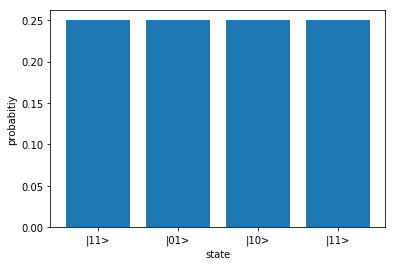

In [6]:
plt.bar(range(len(outputstate)), np.abs(outputstate)**2)
plt.xticks(range(len(outputstate)), ['|11>','|01>', '|10>', '|11>' ])
plt.ylabel('probabitiy')
plt.xlabel('state')
plt.show()

#### Numerical Simulation (unitary)

In [7]:
# load the backend
backend = BasicAer.get_backend('unitary_simulator')

# create a program to run
job = execute(qc, backend)

# get the results
result = job.result()
# Show the results
print(result.get_unitary())

[[ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]]


#### Real(ish) Data

We're mostly going to be interested in the output from a quanutm computer where we don't find out what the full state is, rather, we get a single output with probaility goverend by the respective probability amplitude.  Forutnately Qiskit lets generate some fake data!

In [8]:
# we first need to measure the qubits
qc.barrier(q)
qc.measure(q, c)

# lets check this
qc.draw()

In [9]:
# load the backend
backend = BasicAer.get_backend('qasm_simulator')

# select the number of shots (repeats) of the experiment, and run the job
job = execute(qc, backend, shots=1024)
result = job.result()
print(result.get_counts(qc))

{'11': 235, '10': 249, '01': 260, '00': 280}


Yay! Your first quanutm data!